In [5]:
#Load the dataset
import pandas as pd

# Load the dataset (replace the file path with the actual path)
file_path = 'C:/Users/parve/OneDrive/Desktop/desktop/ds project/freelancer_job_postings0.csv'
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectId              9193 non-null   int64  
 1   job_title              9193 non-null   object 
 2   job_description        9193 non-null   object 
 3   tags                   9193 non-null   object 
 4   client_state           8828 non-null   object 
 5   client_country         9192 non-null   object 
 6   client_average_rating  9193 non-null   float64
 7   client_review_count    9193 non-null   int64  
 8   min_price              9193 non-null   float64
 9   max_price              9193 non-null   float64
 10  avg_price              9193 non-null   float64
 11  currency               9193 non-null   object 
 12  rate_type              9193 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 933.8+ KB


In [6]:
data.shape

(9193, 13)

In [7]:
#Check for missing values and data types
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print(missing_values)

# Display data types of the columns
print(data.dtypes)
total_missing = data.isnull().sum().sum()
print(f"Total missing values: {total_missing}")
# Assuming df is your DataFrame
missing_columns = data.columns[data.isnull().any()].tolist()
print(missing_columns)

projectId                  0
job_title                  0
job_description            0
tags                       0
client_state             365
client_country             1
client_average_rating      0
client_review_count        0
min_price                  0
max_price                  0
avg_price                  0
currency                   0
rate_type                  0
dtype: int64
projectId                  int64
job_title                 object
job_description           object
tags                      object
client_state              object
client_country            object
client_average_rating    float64
client_review_count        int64
min_price                float64
max_price                float64
avg_price                float64
currency                  object
rate_type                 object
dtype: object
Total missing values: 366
['client_state', 'client_country']


In [8]:
#Handle missing values
# Fill missing values in 'client_state' with 'Unknown'
data['client_state'].fillna('Unknown', inplace=True)

# Fill missing values in 'client_country' with 'Unknown'
data['client_country'].fillna('Unknown', inplace=True)

# Check for missing values after filling
data.isnull().sum()


projectId                0
job_title                0
job_description          0
tags                     0
client_state             0
client_country           0
client_average_rating    0
client_review_count      0
min_price                0
max_price                0
avg_price                0
currency                 0
rate_type                0
dtype: int64

In [9]:
missing_values = data.isnull().sum()

# Display missing values
print(missing_values)

# Display data types of the columns
print(data.dtypes)
total_missing = data.isnull().sum().sum()
print(f"Total missing values: {total_missing}")


projectId                0
job_title                0
job_description          0
tags                     0
client_state             0
client_country           0
client_average_rating    0
client_review_count      0
min_price                0
max_price                0
avg_price                0
currency                 0
rate_type                0
dtype: int64
projectId                  int64
job_title                 object
job_description           object
tags                      object
client_state              object
client_country            object
client_average_rating    float64
client_review_count        int64
min_price                float64
max_price                float64
avg_price                float64
currency                  object
rate_type                 object
dtype: object
Total missing values: 0


In [10]:
# Convert price columns to numeric, forcing errors to NaN
data['min_price'] = pd.to_numeric(data['min_price'], errors='coerce')
data['max_price'] = pd.to_numeric(data['max_price'], errors='coerce')
data['avg_price'] = pd.to_numeric(data['avg_price'], errors='coerce')

# Check the data types after conversion
data.dtypes


projectId                  int64
job_title                 object
job_description           object
tags                      object
client_state              object
client_country            object
client_average_rating    float64
client_review_count        int64
min_price                float64
max_price                float64
avg_price                float64
currency                  object
rate_type                 object
dtype: object

In [11]:
#Convert tags column from string to list
import ast

# Convert the 'tags' column from string representation to an actual list
data['tags'] = data['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Display the first few rows to verify
data['tags'].head()


0    [algorithm, java, python, machine learning (ml...
1    [excel, statistical analysis, statistics, spss...
2    [web scraping, data mining, data entry, excel,...
3    [big data sales, data science, data mining, st...
4    [data entry, virtual assistant, web search, ex...
Name: tags, dtype: object

In [12]:
#Encode categorical variables
# One-hot encode categorical variables such as 'client_country', 'currency', and 'rate_type'
data = pd.get_dummies(data, columns=['client_country', 'currency', 'rate_type'], drop_first=True)

# Check the new columns added after one-hot encoding
data.head()


,projectId,job_title,job_description,tags,client_state,client_average_rating,client_review_count,min_price,max_price,avg_price,...,client_country_ullern,currency_CAD,currency_EUR,currency_GBP,currency_HKD,currency_INR,currency_NZD,currency_SGD,currency_USD,rate_type_hourly
0,37426471,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"[algorithm, java, python, machine learning (ml...",Heilbronn,5.0,17,8.0,30.0,19.0,...,False,False,True,False,False,False,False,False,False,False
1,37421546,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"[excel, statistical analysis, statistics, spss...",Nagpur,0.0,0,750.0,1250.0,1000.0,...,False,False,False,False,False,True,False,False,False,True
2,37400492,Data Scrap,I am looking for a freelancer who can help me ...,"[web scraping, data mining, data entry, excel,...",Eaubonne,5.0,1,30.0,250.0,140.0,...,False,False,True,False,False,False,False,False,False,False
3,37404568,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"[big data sales, data science, data mining, st...",Mundra,5.0,2,5000.0,5500.0,5250.0,...,False,False,False,False,False,True,False,False,False,False
4,37397423,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"[data entry, virtual assistant, web search, ex...",Unknown,0.0,0,5.0,15.0,10.0,...,False,False,False,False,False,False,False,False,True,True


In [13]:
# Create a price range feature
data['price_range'] = data['max_price'] - data['min_price']

# Round off average ratings
data['client_average_rating'] = data['client_average_rating'].round(1)

# Display the first few rows to confirm changes
print(data[['min_price', 'max_price', 'price_range', 'client_average_rating']].head())



   min_price  max_price  price_range  client_average_rating
0        8.0       30.0         22.0                    5.0
1      750.0     1250.0        500.0                    0.0
2       30.0      250.0        220.0                    5.0
3     5000.0     5500.0        500.0                    5.0
4        5.0       15.0         10.0                    0.0


In [14]:
#Normalize text fields
# Normalize 'job_title' and 'job_description' by converting to lowercase and removing special characters
data['job_title'] = data['job_title'].str.lower().str.replace('[^\w\s]', '', regex=True)
data['job_description'] = data['job_description'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Display normalized text columns
data[['job_title', 'job_description']].head()


,job_title,job_description
0,development and implementation of a federated ...,please bid only if you are ready to do the wor...
1,data entry 2,project title data entry data analysis in exc...
2,data scrap,i am looking for a freelancer who can help me ...
3,big data project,store sales data analysis a data engineering c...
4,virtual assistant research assistant,job description i am seeking a virtual assista...


In [15]:
# Preview the final DataFrame
print(data.head())


   projectId                                          job_title  \
0   37426471  development and implementation of a federated ...   
1   37421546                                     data entry   2   
2   37400492                                         data scrap   
3   37404568                                   big data project   
4   37397423             virtual assistant  research assistant    

                                     job_description  \
0  please bid only if you are ready to do the wor...   
1  project title data entry  data analysis in exc...   
2  i am looking for a freelancer who can help me ...   
3  store sales data analysis a data engineering c...   
4  job description i am seeking a virtual assista...   

                                                tags client_state  \
0  [algorithm, java, python, machine learning (ml...    Heilbronn   
1  [excel, statistical analysis, statistics, spss...       Nagpur   
2  [web scraping, data mining, data entry, excel,... 

In [16]:
# Display the processed data (first few rows)
print(data.head())

# Save the processed DataFrame to a new CSV file
data.to_csv('processed_dataset.csv', index=False)

# Confirmation message after saving
print("Processed data has been saved successfully!")


   projectId                                          job_title  \
0   37426471  development and implementation of a federated ...   
1   37421546                                     data entry   2   
2   37400492                                         data scrap   
3   37404568                                   big data project   
4   37397423             virtual assistant  research assistant    

                                     job_description  \
0  please bid only if you are ready to do the wor...   
1  project title data entry  data analysis in exc...   
2  i am looking for a freelancer who can help me ...   
3  store sales data analysis a data engineering c...   
4  job description i am seeking a virtual assista...   

                                                tags client_state  \
0  [algorithm, java, python, machine learning (ml...    Heilbronn   
1  [excel, statistical analysis, statistics, spss...       Nagpur   
2  [web scraping, data mining, data entry, excel,... 

In [17]:
# Save to the preprocessed dataset to a specific folder
data.to_csv('C:/Users/parve/OneDrive/Desktop/desktop/ds project/freelancer_job_postings0.csv', index=False)


In [18]:
#Algorithm usage
#Loading preprocessed dataset
import pandas as pd

# Load the preprocessed dataset
file_path = 'C:/Users/parve/OneDrive/Desktop/desktop/ds project/freelancer_job_postings0.csv'
data = pd.read_csv(file_path)

# Inspect the data
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Columns: 197 entries, projectId to price_range
dtypes: bool(186), float64(5), int64(2), object(4)
memory usage: 2.4+ MB


In [19]:
# Univariate analysis for projectId
# Count of unique project IDs
unique_project_count = data['projectId'].nunique()

# Display the result
print(f"Number of unique project IDs: {unique_project_count}")

# Display the list of unique project IDs
print(f"Unique project IDs: {data['projectId'].unique()}")

Number of unique project IDs: 9193
Unique project IDs: [37426471 37421546 37400492 ... 31185401 31189015 31192514]


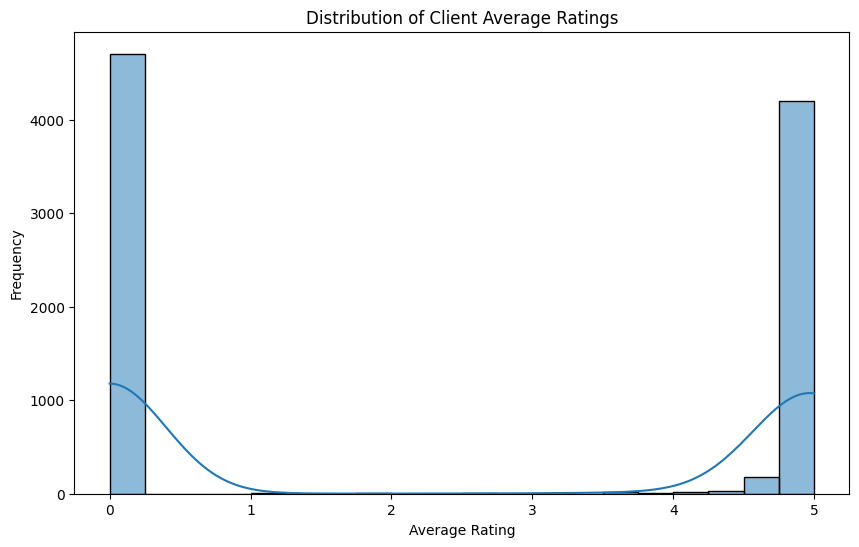

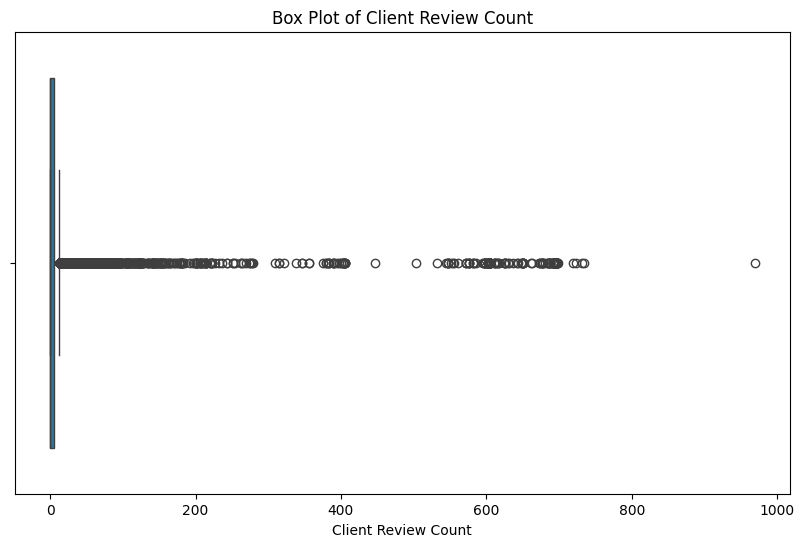

In [20]:
#univarient
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Variables
# Distribution of client average rating
plt.figure(figsize=(10, 6))
sns.histplot(data['client_average_rating'], bins=20, kde=True)
plt.title('Distribution of Client Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Box plot for client review count
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['client_review_count'])
plt.title('Box Plot of Client Review Count')
plt.xlabel('Client Review Count')
plt.show()


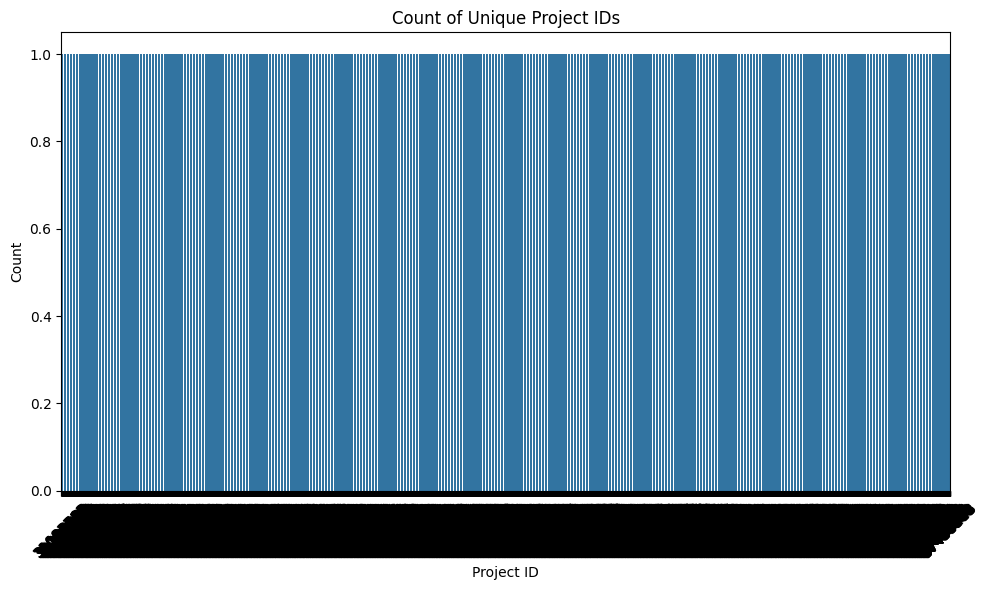

In [21]:
# Prepare data for visualization
project_counts = data['projectId'].value_counts().reset_index()
project_counts.columns = ['projectId', 'count']

# Plotting the unique project IDs
plt.figure(figsize=(10, 6))
sns.barplot(x='projectId', y='count', data=project_counts)
plt.title('Count of Unique Project IDs')
plt.xlabel('Project ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
unique_job_title_count = data['job_title'].nunique()
print(f"Number of unique job titles: {unique_job_title_count}")

Number of unique job titles: 8288


In [23]:
# 2. Frequency distribution of job titles
job_title_counts = data['job_title'].value_counts()
print("\nFrequency distribution of job titles:")
print(job_title_counts)


Frequency distribution of job titles:
job_title
data analysis                                            106
data entry                                                59
data analysis                                             45
data entry                                                30
data analyst                                              25
                                                        ... 
excel work sheet  2                                        1
data science project  machine learning on health data      1
unsupervised learning project on health data               1
python guru needed  9                                      1
urgent gcpcloudmigration812 years                          1
Name: count, Length: 8288, dtype: int64


C:\Users\parve\AppData\Local\Temp\ipykernel_15332\4195550230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=job_title_counts.index[:10], x=job_title_counts.values[:10], palette='Blues_d')  # Top 10 job titles


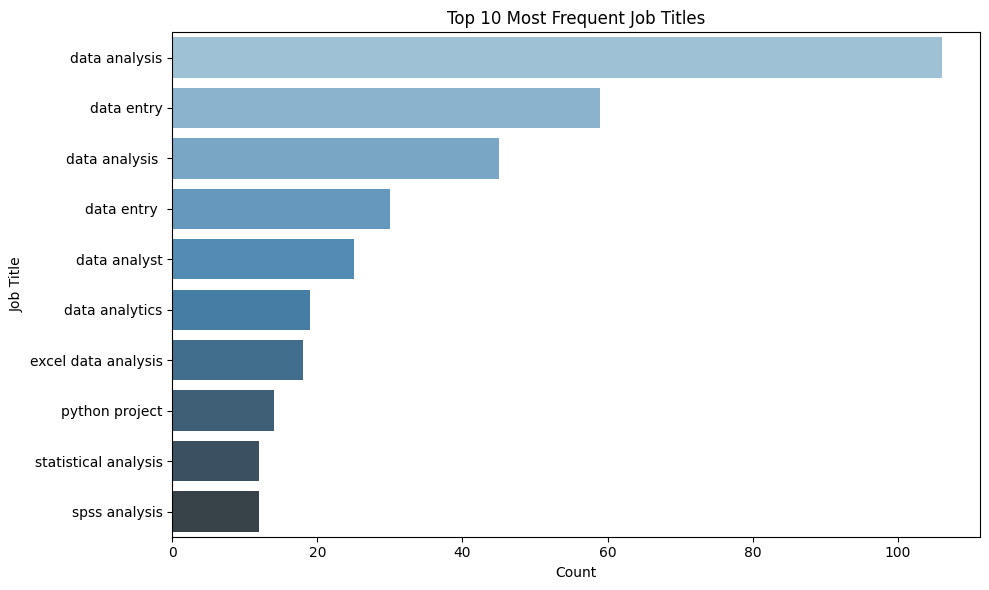

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(y=job_title_counts.index[:10], x=job_title_counts.values[:10], palette='Blues_d')  # Top 10 job titles
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

C:\Users\parve\AppData\Local\Temp\ipykernel_15332\680209539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Blues_d')


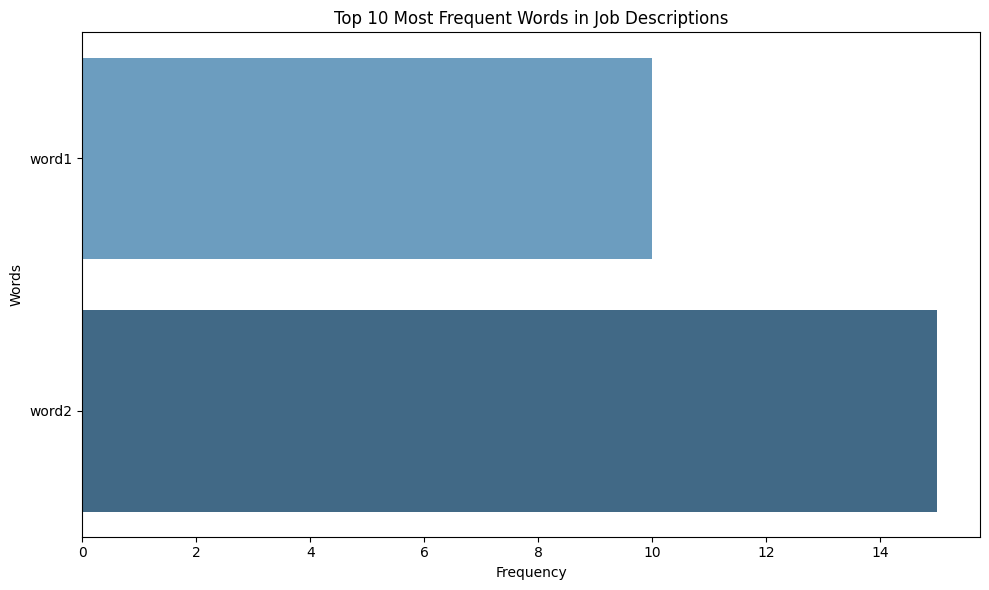

In [25]:
word_freq_df = pd.DataFrame({'Word': ['word1', 'word2'], 'Frequency': [10, 15]})

# Visualize the top 10 most frequent words using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Blues_d')
plt.title('Top 10 Most Frequent Words in Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

C:\Users\parve\AppData\Local\Temp\ipykernel_15332\1551767661.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tag', data=tag_freq_df, palette='Blues_d')  # Corrected 'data' argument


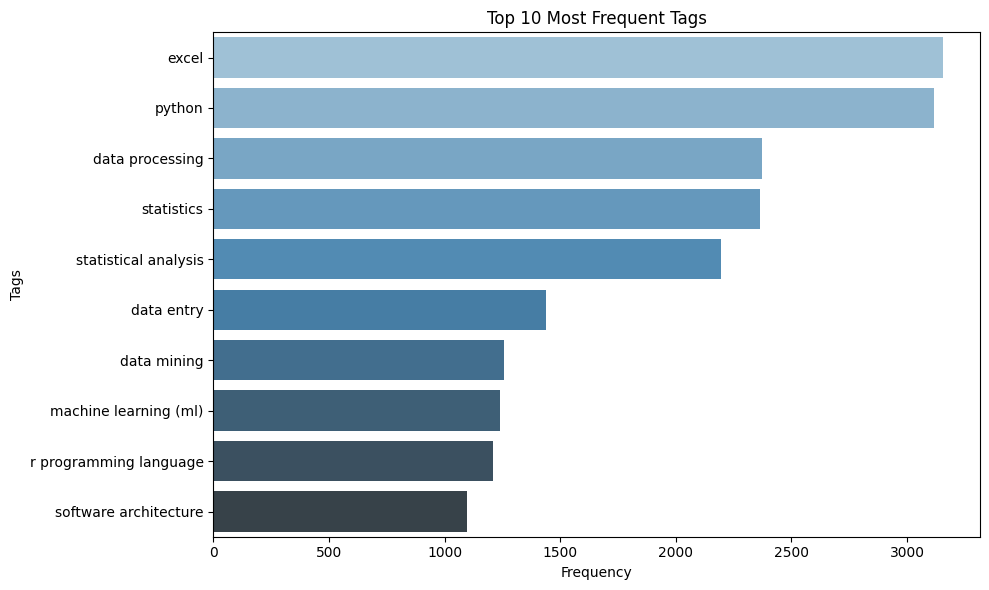

In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming 'data' contains a 'tags' column

# 1. Flatten the list of tags
# Convert the string representation of lists into actual lists
if data['tags'].dtype == 'object':
    # Convert the string representation of lists into actual lists
    data['tags'] = data['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# 2. Flatten the list of tags
# Create a flat list of all tags
all_tags = [tag for sublist in data['tags'] for tag in sublist]

# 3. Count tag frequencies
tag_counts = Counter(all_tags)

# Convert tag frequencies to a DataFrame for easier manipulation
tag_freq_df = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Frequency'])

# 4. Visualize the top 10 most frequent tags using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Tag', data=tag_freq_df, palette='Blues_d')  # Corrected 'data' argument
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()


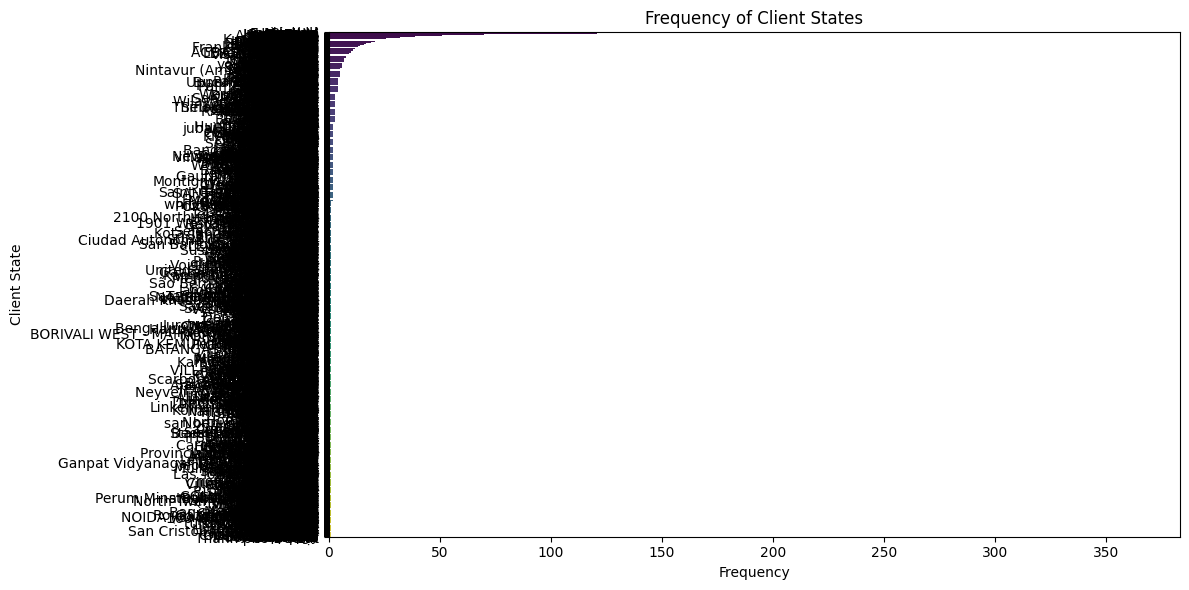

In [27]:
import warnings
warnings.filterwarnings("ignore")
# 1. Count the frequency of each client state
state_counts = data['client_state'].value_counts()

# 2. Convert to a DataFrame for easier plotting
state_freq_df = state_counts.reset_index()
state_freq_df.columns = ['Client State', 'Frequency']

# 3. Visualize the frequency of client states using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Client State', data=state_freq_df, palette='viridis')
plt.title('Frequency of Client States')
plt.xlabel('Frequency')
plt.ylabel('Client State')
plt.tight_layout()
plt.show()

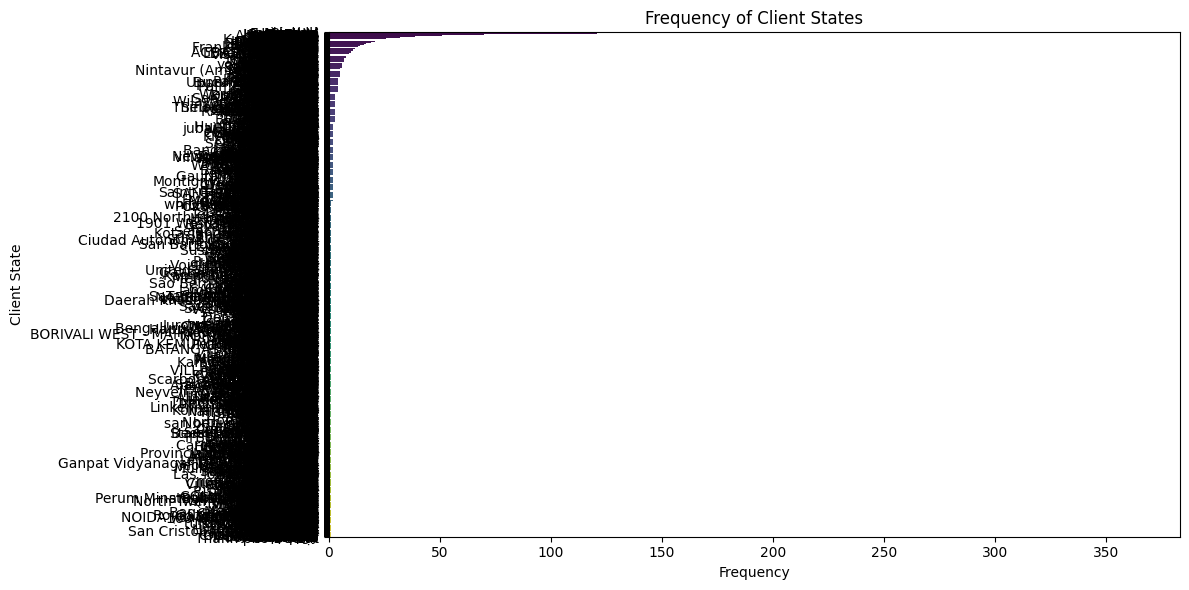

In [28]:
# 1. Count the frequency of each client state (assuming 'client_state' is relevant)
client_state_counts = data['client_state'].value_counts()

# 2. Convert to DataFrame for easier plotting
client_state_freq_df = client_state_counts.reset_index()
client_state_freq_df.columns = ['Client State', 'Frequency']

# 3. Visualize the frequency of client states using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Client State', data=client_state_freq_df, palette='viridis')
plt.title('Frequency of Client States')
plt.xlabel('Frequency')
plt.ylabel('Client State')
plt.tight_layout()
plt.show()


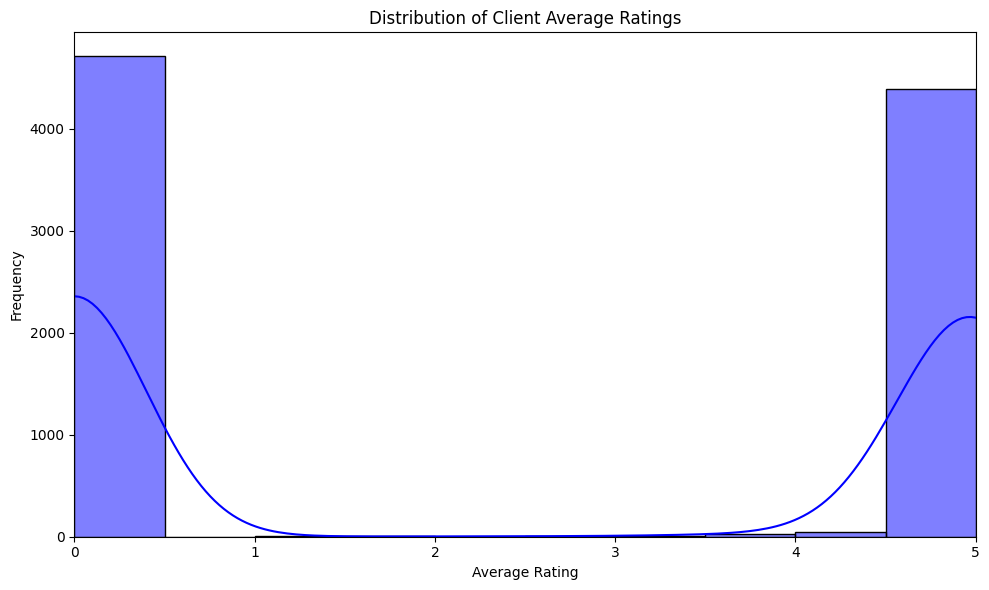

In [29]:
# 1. Plot a histogram for client average ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['client_average_rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Client Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.xlim(0, 5)  # Assuming the ratings range from 0 to 5
plt.tight_layout()
plt.show()

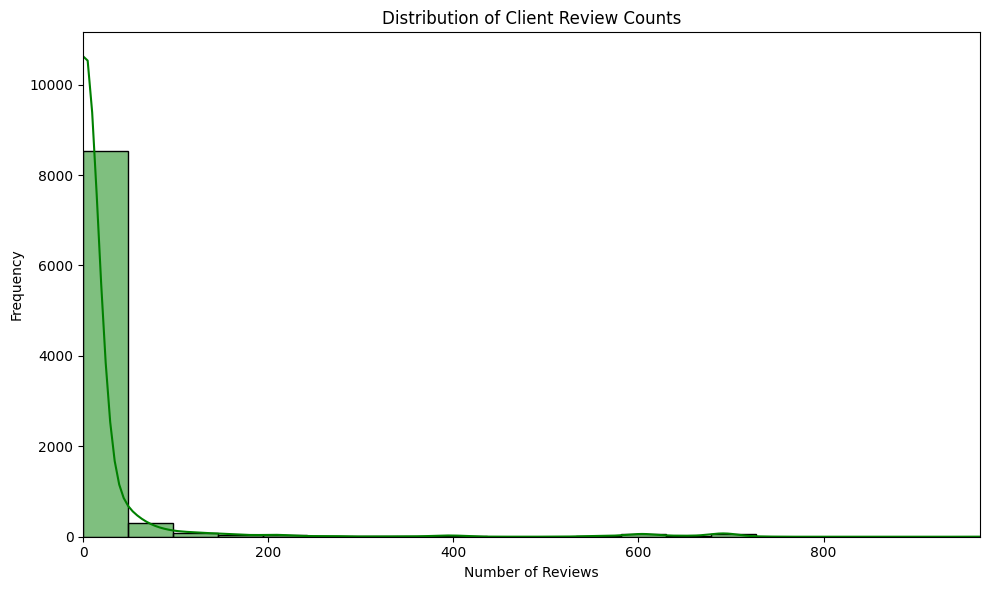

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['client_review_count'], bins=20, kde=True, color='green')
plt.title('Distribution of Client Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, data['client_review_count'].max())  # Set x limit to max review count
plt.tight_layout()
plt.show()

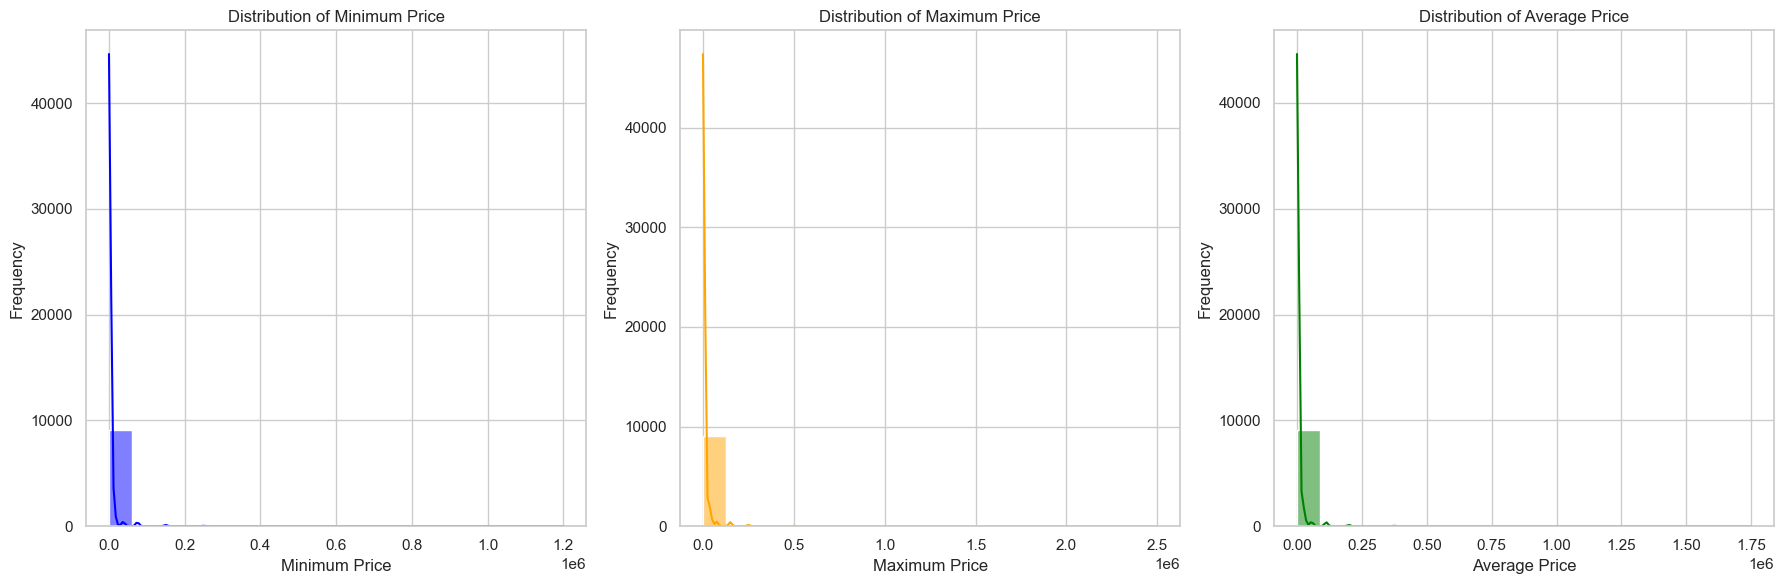

In [31]:
sns.set(style='whitegrid')

# Create subplots for min_price, max_price, and avg_price
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for min_price
sns.histplot(data['min_price'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Minimum Price')
axes[0].set_xlabel('Minimum Price')
axes[0].set_ylabel('Frequency')

# Plot histogram for max_price
sns.histplot(data['max_price'], bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Maximum Price')
axes[1].set_xlabel('Maximum Price')
axes[1].set_ylabel('Frequency')

# Plot histogram for avg_price
sns.histplot(data['avg_price'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Average Price')
axes[2].set_xlabel('Average Price')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

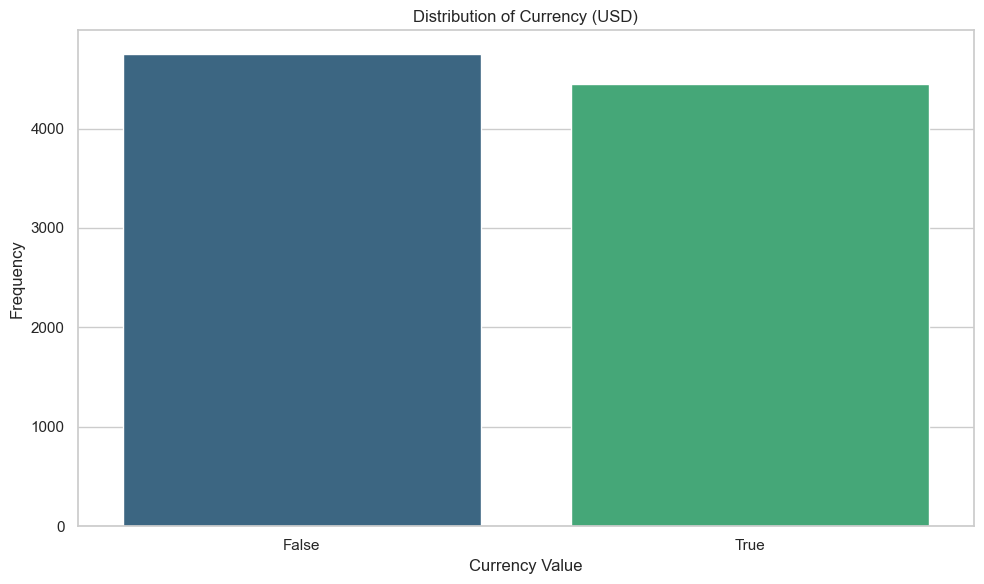

In [32]:
sns.set(style='whitegrid')

# Count the frequency of the 'currency_USD' column
currency_usd_count = data['currency_USD'].value_counts()

# Create a bar plot for the 'currency_USD' distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=currency_usd_count.index, y=currency_usd_count.values, palette='viridis')
plt.title('Distribution of Currency (USD)')
plt.xlabel('Currency Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


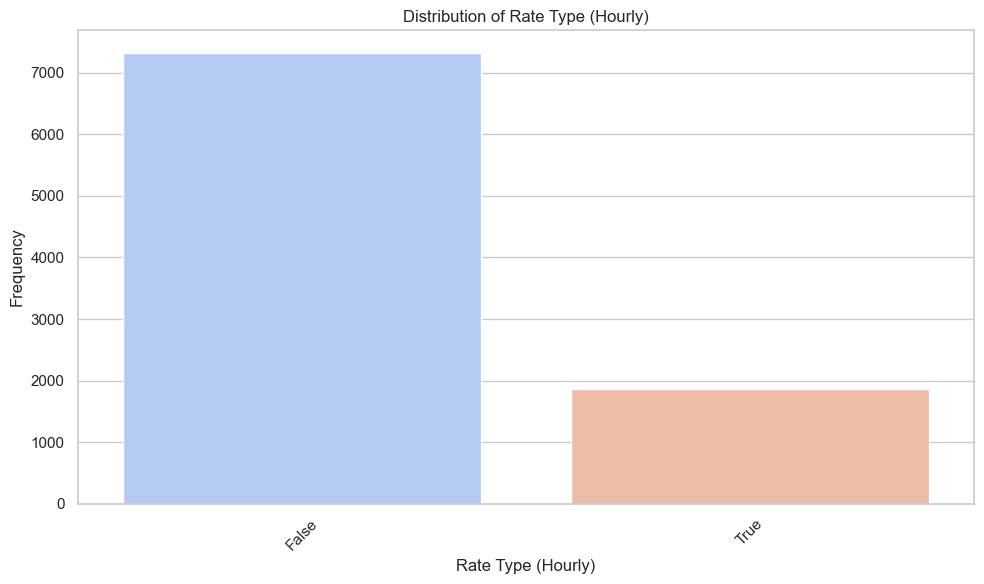

In [33]:
sns.set(style='whitegrid')

# Count the frequency of the 'rate_type_hourly' column
rate_type_counts = data['rate_type_hourly'].value_counts()

# Create a bar plot for rate_type_hourly distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rate_type_counts.index, y=rate_type_counts.values, palette='coolwarm')
plt.title('Distribution of Rate Type (Hourly)')
plt.xlabel('Rate Type (Hourly)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


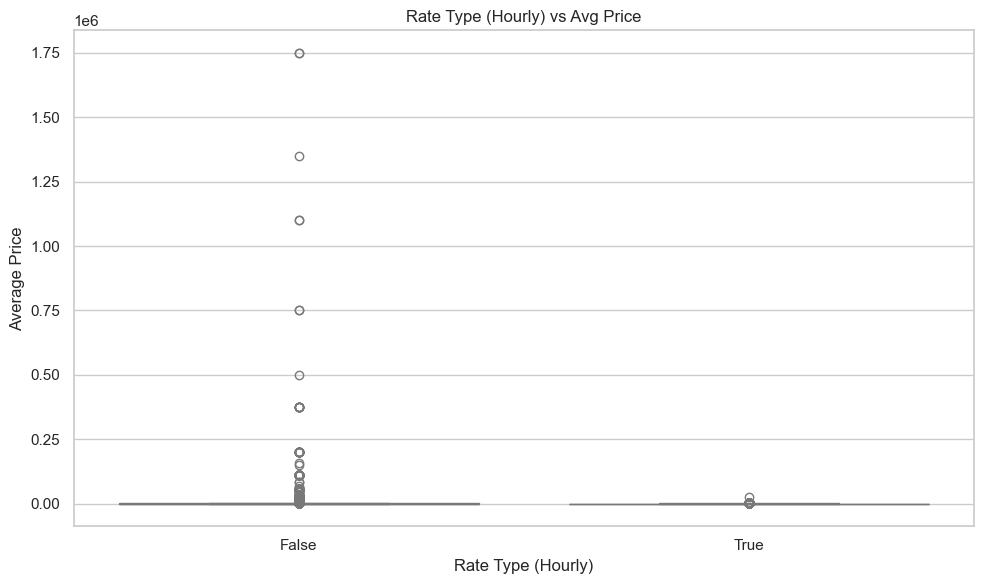

In [34]:
# Bivariate analysis: Rate Type (Hourly) vs Avg Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='rate_type_hourly', y='avg_price', data=data, palette='coolwarm')
plt.title('Rate Type (Hourly) vs Avg Price')
plt.xlabel('Rate Type (Hourly)')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


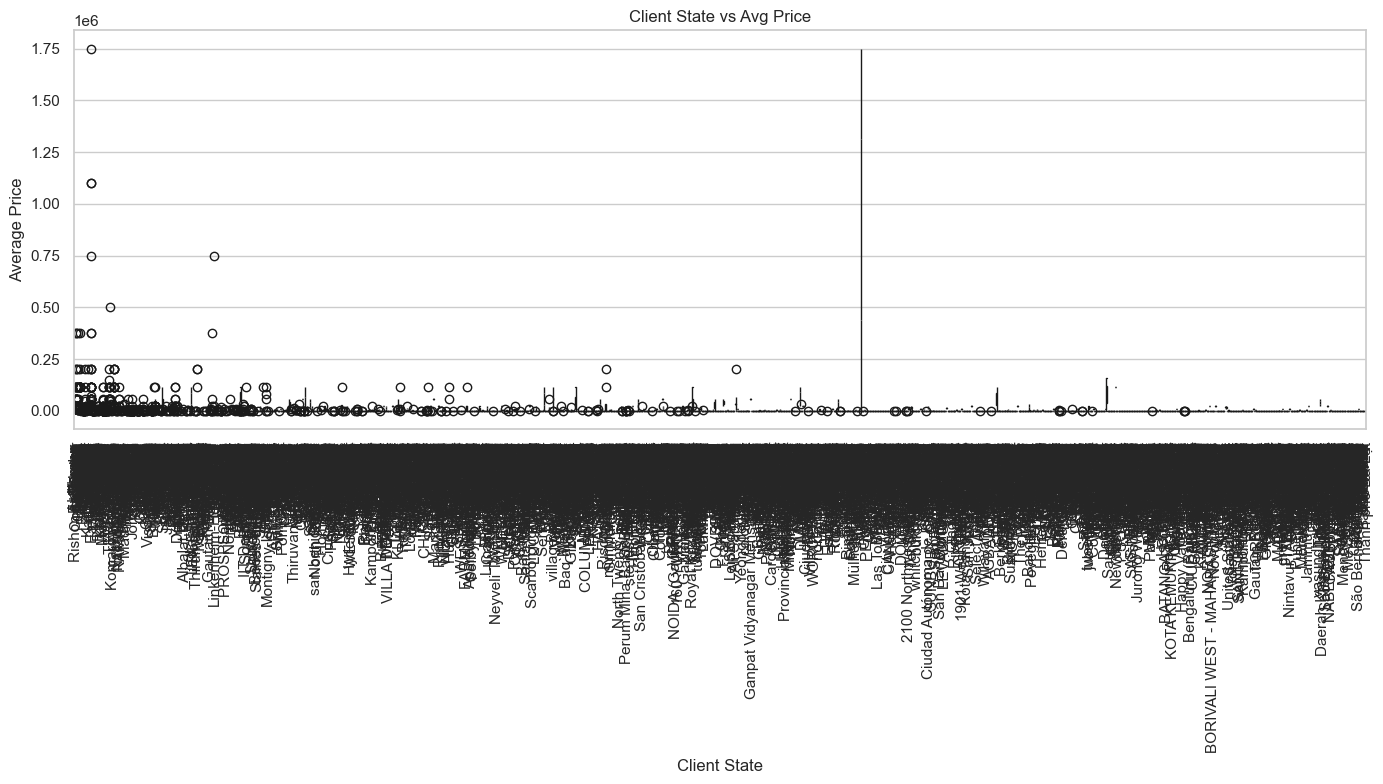

In [35]:
# Bivariate analysis: Client State vs Avg Price
plt.figure(figsize=(14, 8))
sns.boxplot(x='client_state', y='avg_price', data=data, palette='viridis')
plt.title('Client State vs Avg Price')
plt.xlabel('Client State')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()  # Remove the .3 here
plt.show()


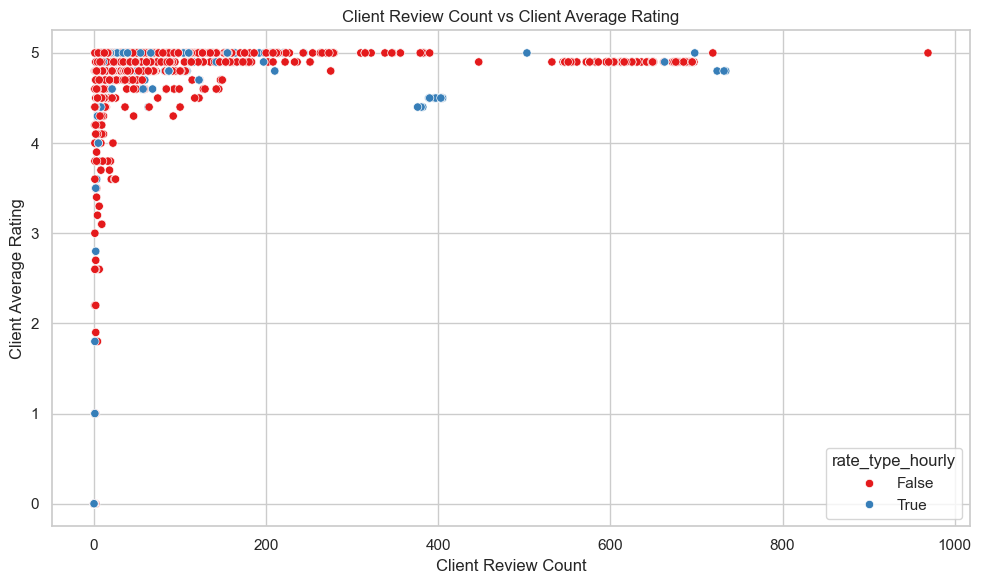

In [36]:
# Bivariate analysis: Client Review Count vs Client Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='client_review_count', y='client_average_rating', data=data, hue='rate_type_hourly', palette='Set1')
plt.title('Client Review Count vs Client Average Rating')
plt.xlabel('Client Review Count')
plt.ylabel('Client Average Rating')
plt.tight_layout()
plt.show()


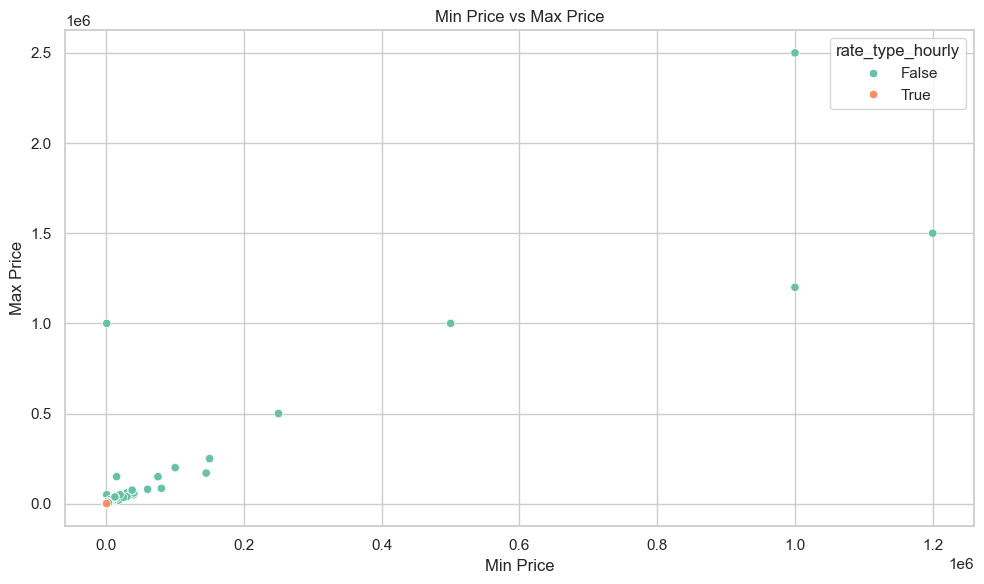

In [37]:
# Bivariate analysis: Min Price vs Max Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_price', y='max_price', data=data, hue='rate_type_hourly', palette='Set2')
plt.title('Min Price vs Max Price')
plt.xlabel('Min Price')
plt.ylabel('Max Price')
plt.tight_layout()
plt.show()


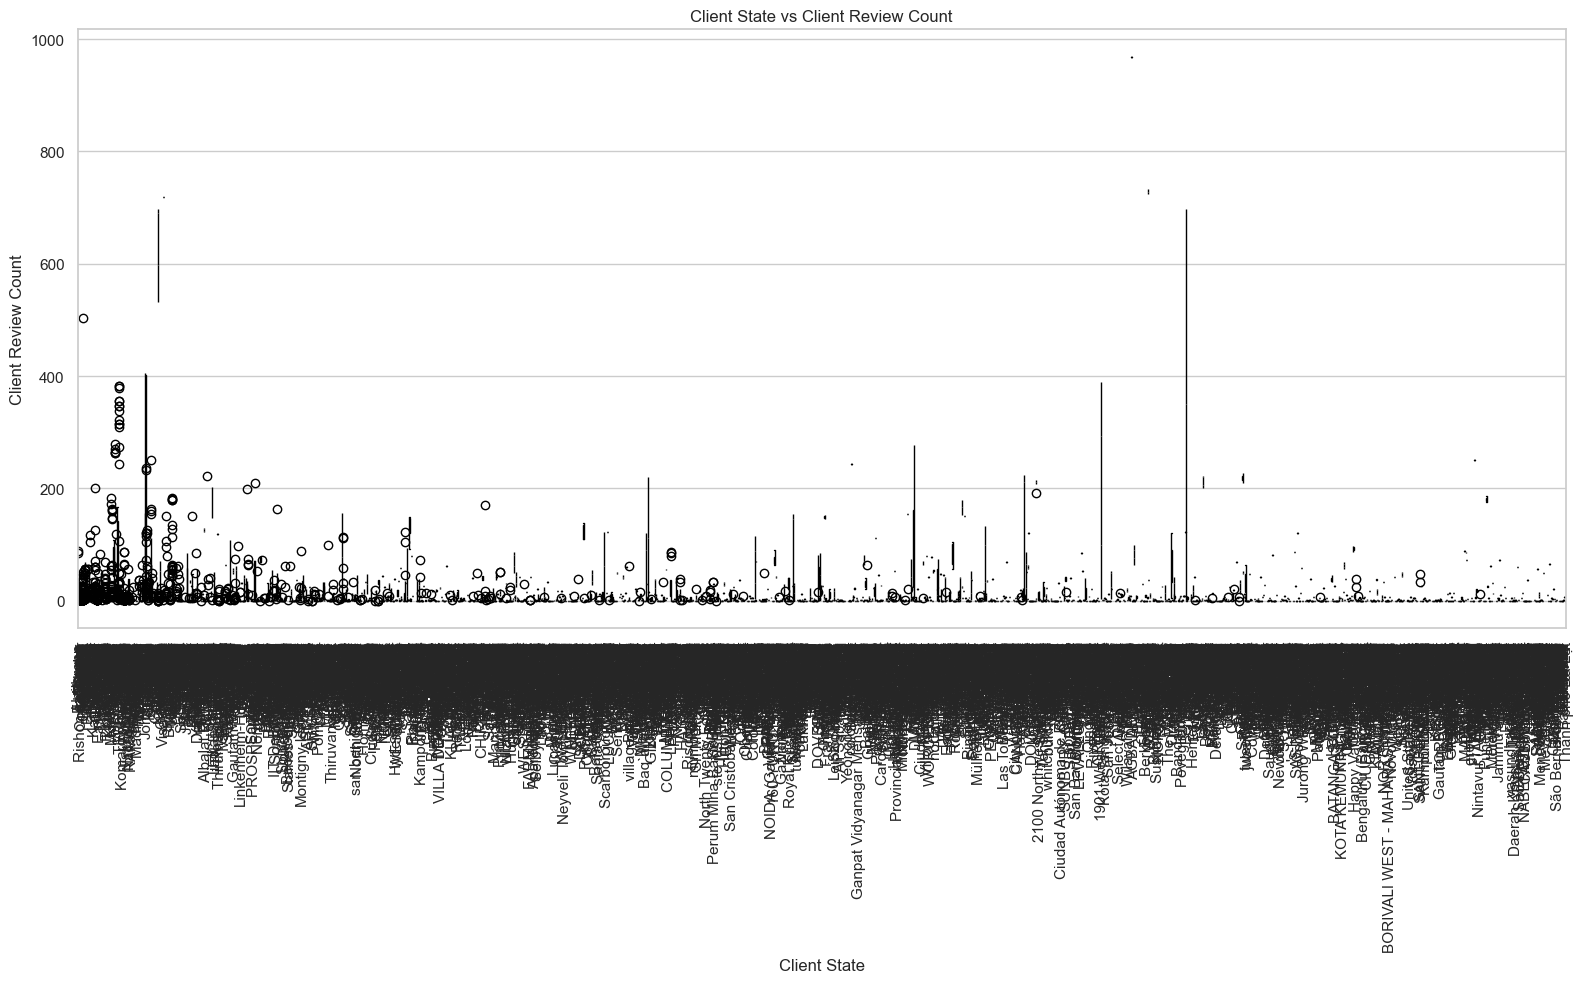

In [38]:
plt.figure(figsize=(16, 10))  # Increase the figure size
sns.boxplot(x='client_state', y='client_review_count', data=data, palette='magma')
plt.title('Client State vs Client Review Count')
plt.xlabel('Client State')
plt.ylabel('Client Review Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


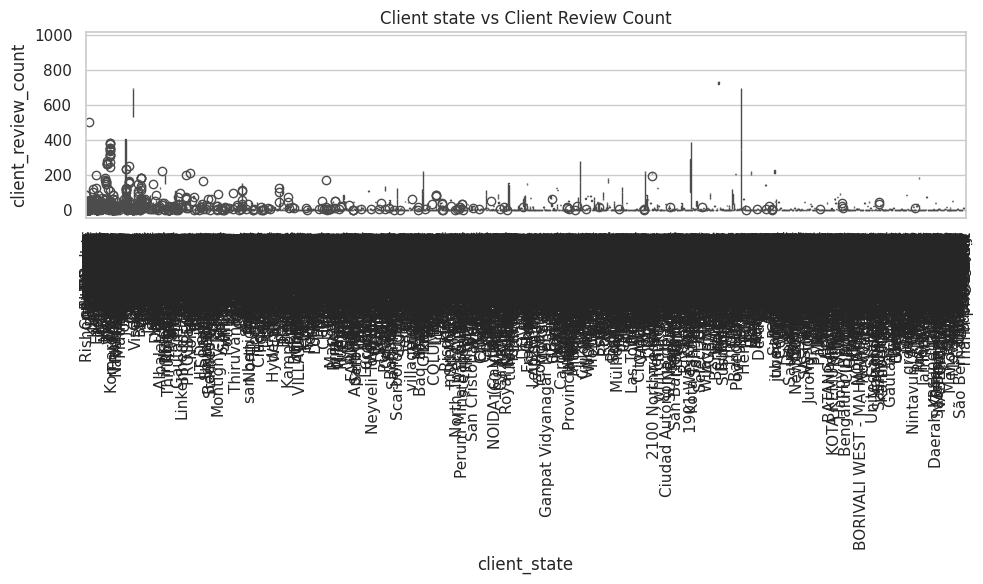

In [39]:
# Bivariate analysis: Client State vs Client Average Rating
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Now re-run your plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='client_state', y='client_review_count', data=data)
plt.title('Client state vs Client Review Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



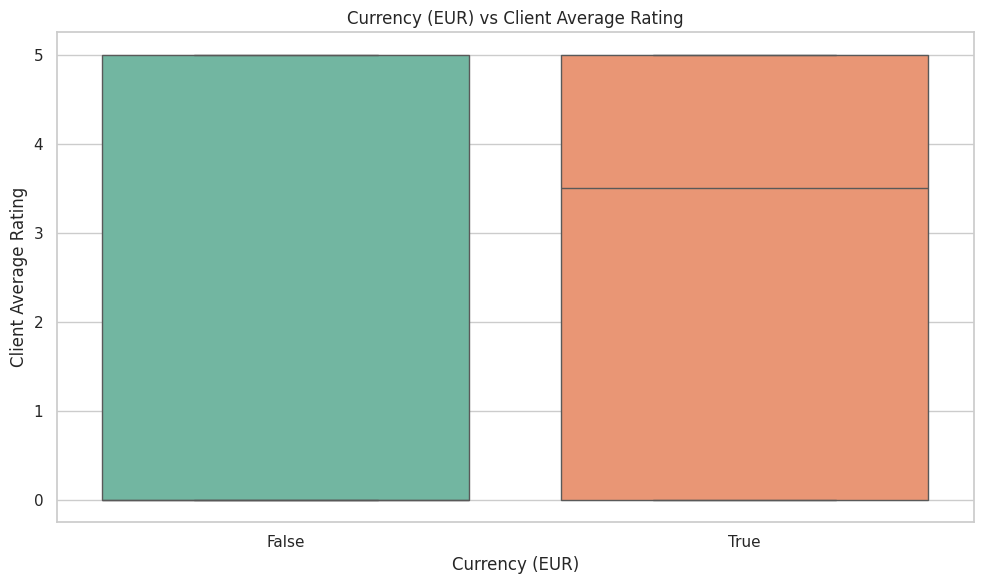

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='currency_EUR', y='client_average_rating', data=data, palette='Set2')
plt.title('Currency (EUR) vs Client Average Rating')
plt.xlabel('Currency (EUR)')
plt.ylabel('Client Average Rating')
plt.tight_layout()
plt.show()


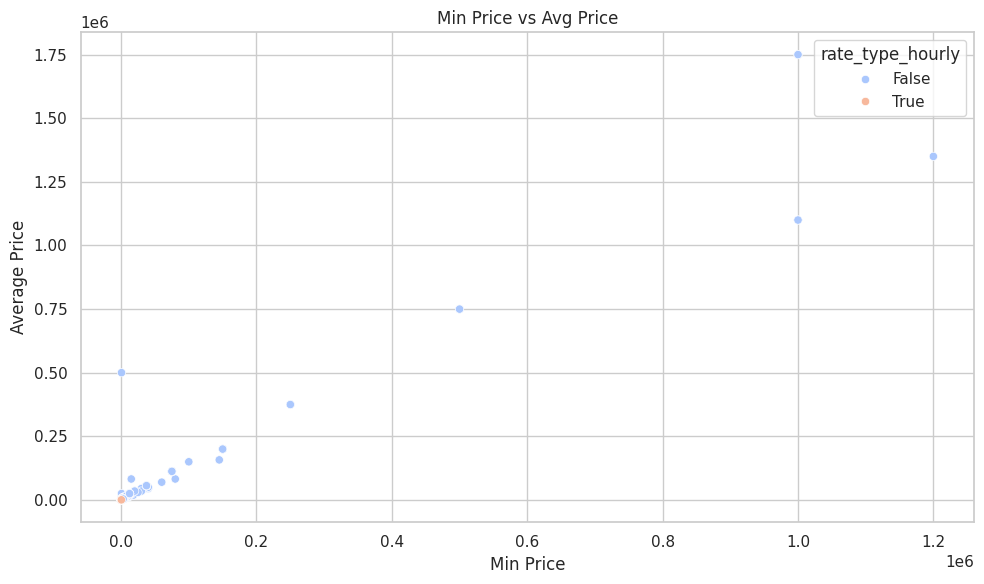

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_price', y='avg_price', data=data, hue='rate_type_hourly', palette='coolwarm')
plt.title('Min Price vs Avg Price')
plt.xlabel('Min Price')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


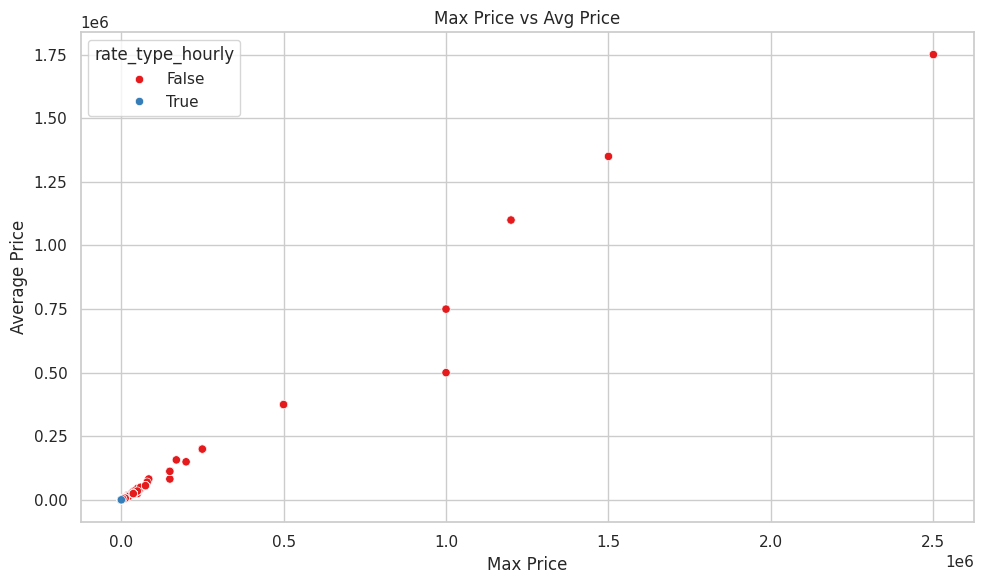

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_price', y='avg_price', data=data, hue='rate_type_hourly', palette='Set1')
plt.title('Max Price vs Avg Price')
plt.xlabel('Max Price')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


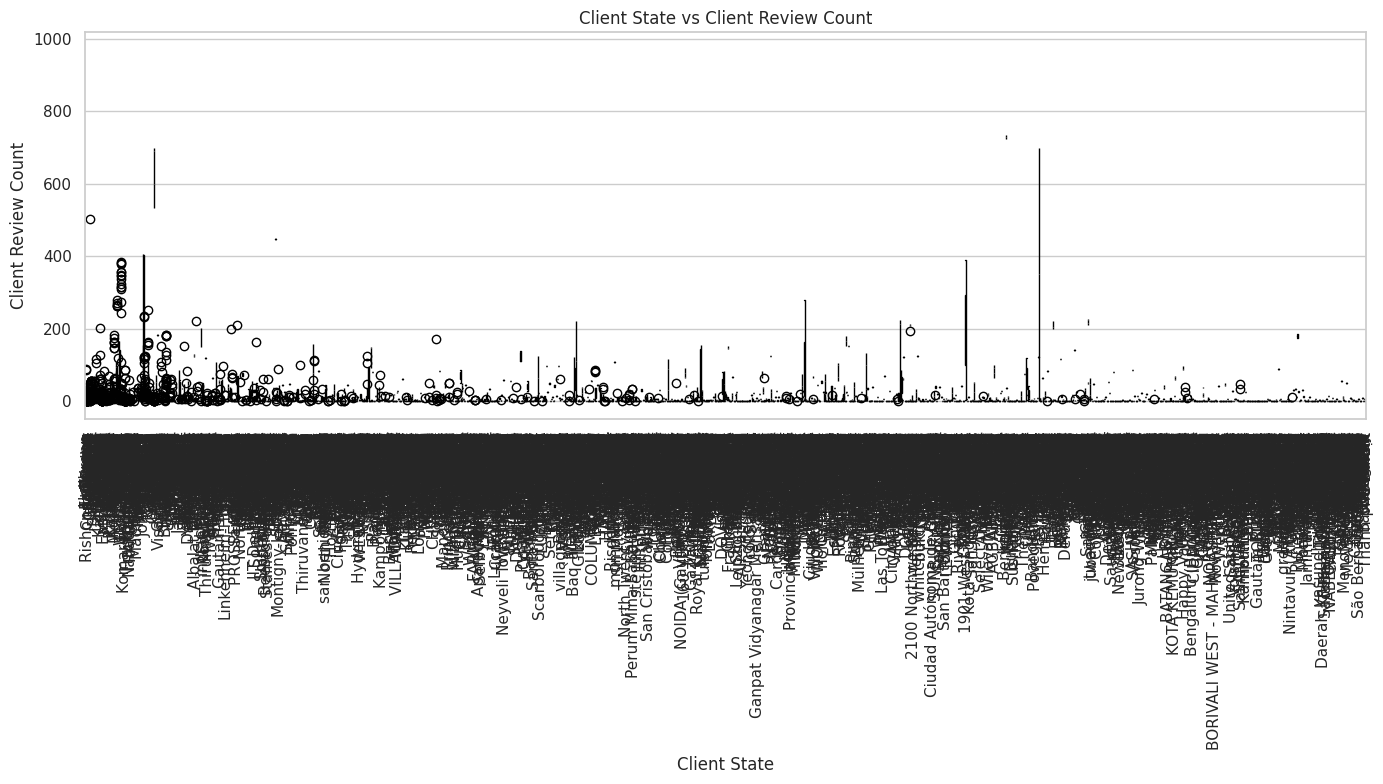

In [43]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='client_state', y='client_review_count', data=data, palette='magma')
plt.title('Client State vs Client Review Count')
plt.xlabel('Client State')
plt.ylabel('Client Review Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


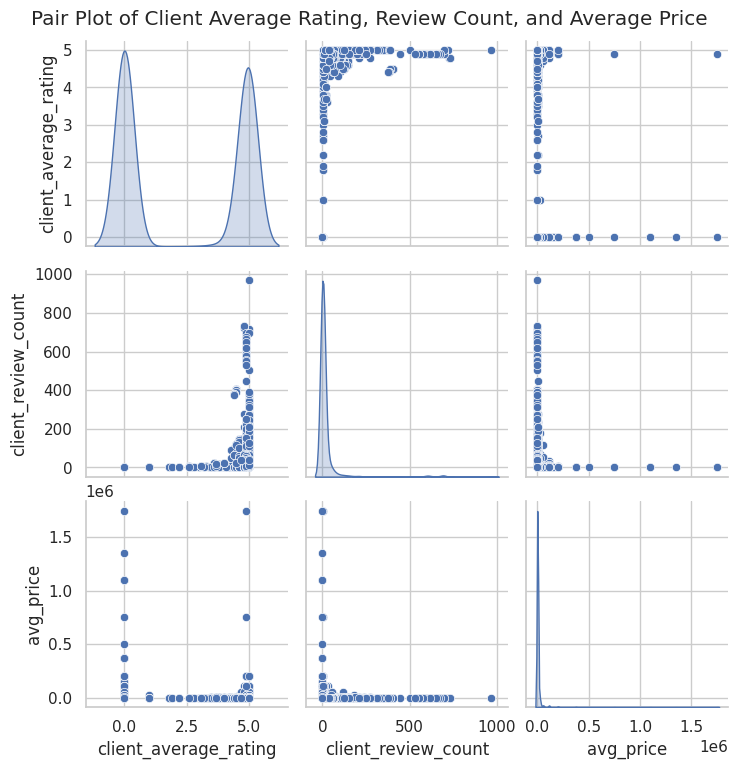

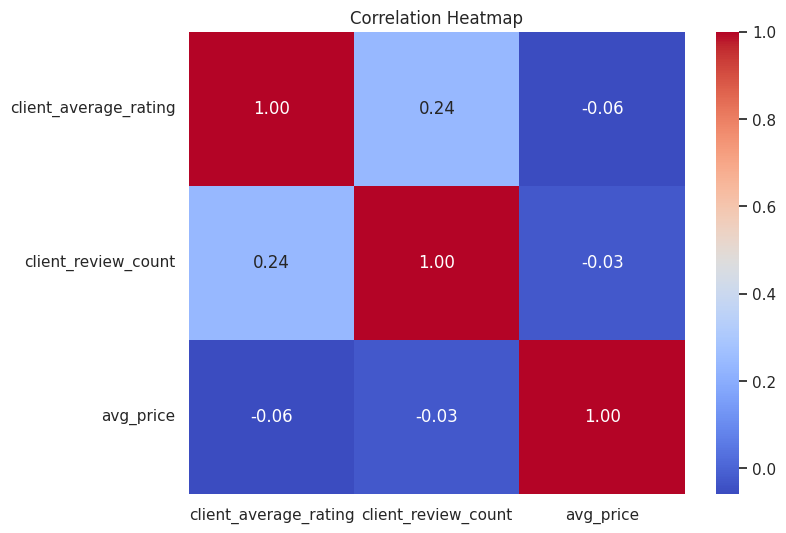

In [44]:
# Pair Plot for visualization of relationships between numeric variables
sns.pairplot(data[['client_average_rating', 'client_review_count', 'avg_price']], diag_kind='kde')
plt.suptitle('Pair Plot of Client Average Rating, Review Count, and Average Price', y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[['client_average_rating', 'client_review_count', 'avg_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

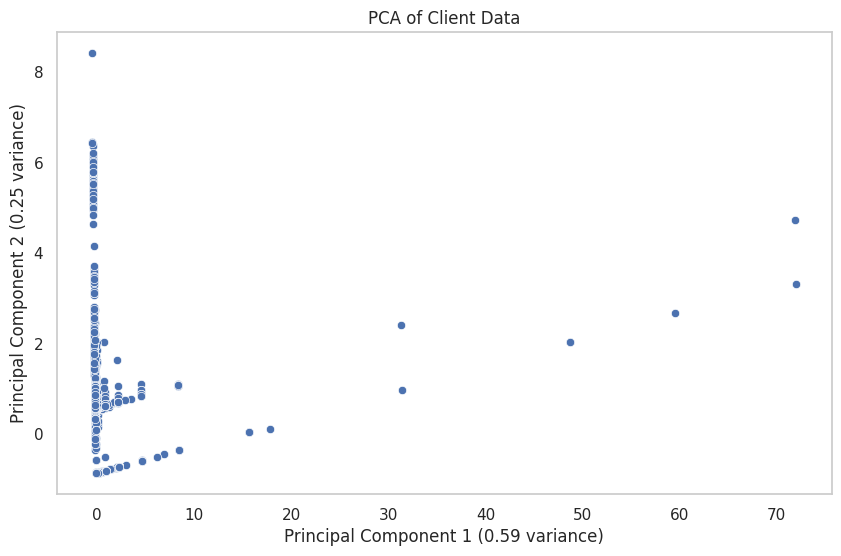

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select numerical columns for PCA
numerical_cols = ['client_average_rating', 'client_review_count', 'min_price', 'max_price', 'avg_price']

# Drop rows with missing values in selected columns
df_pca = data[numerical_cols].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA(n_components=2)  # Change n_components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Client Data')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance)')
plt.grid()
plt.show()

Outlier Rows: 
      projectId                                          job_title  \
0      37426471  development and implementation of a federated ...   
3      37404568                                   big data project   
6      37432305           develop an ai website from the ground up   
7      37383070  develop a linux based bt receiving daemon to g...   
8      37375411                                     data analytics   
...         ...                                                ...   
9177   31173136              data analysis and campaign management   
9181   31177029                principal component analysis expert   
9183   31178742                        data analysis using spss  2   
9190   31185401            business analyst strategic projects   2   
9191   31189015                                ai developer needed   

                                        job_description  \
0     please bid only if you are ready to do the wor...   
3     store sales data ana

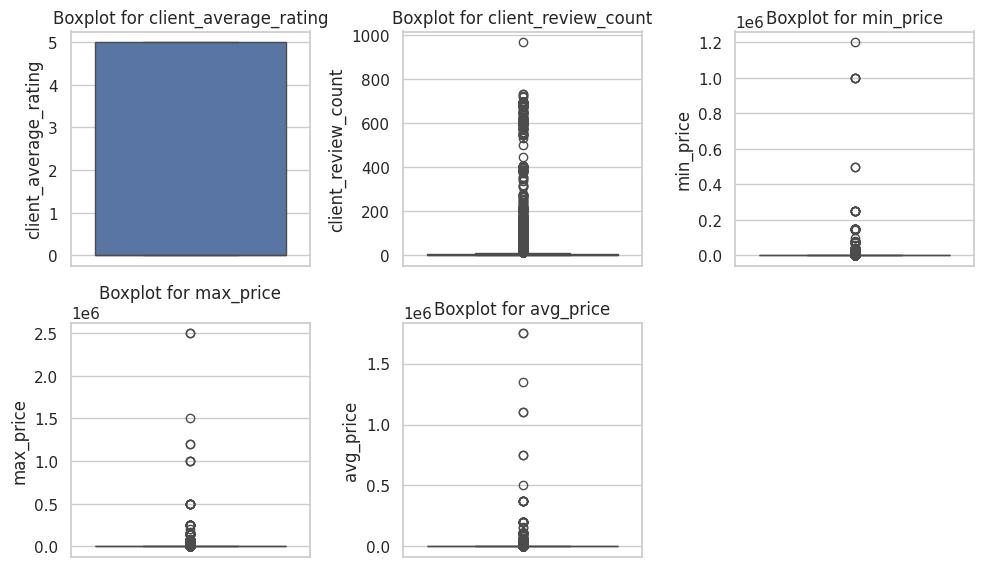

In [46]:
numerical_cols = ['client_average_rating', 'client_review_count', 'min_price', 'max_price', 'avg_price']

# Outlier detection using IQR (Interquartile Range)
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR range
outliers = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))

# Print the rows with outliers
print("Outlier Rows: ")
print(data[outliers.any(axis=1)])

# Visualizing with boxplots
plt.figure(figsize=(10, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [49]:
#LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import statsmodels.api as sm

# Load your dataset
# data = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset path

# Example target variable (change 'your_target_column' to your actual target)
# Make sure your target variable is binary
data['target'] = np.where(data['client_average_rating'] > 4, 1, 0)  # Binary target for example

# Select features and target variable
X = data[['client_review_count', 'min_price', 'max_price', 'avg_price']]  # Features
y = data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: Use statsmodels for a summary of the logistic regression
X_train_sm = sm.add_constant(X_train_scaled)  # Adding a constant for the intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())


Confusion Matrix:
[[942  12]
 [280 605]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       954
           1       0.98      0.68      0.81       885

    accuracy                           0.84      1839
   macro avg       0.88      0.84      0.84      1839
weighted avg       0.87      0.84      0.84      1839

Accuracy: 0.8412180532898315
Optimization terminated successfully.
         Current function value: 0.156158
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 7354
Model:                          Logit   Df Residuals:                     7350
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Oct 2024   Pseudo R-squ.:                  0.7745
Time:                        22:18:44   Log-Likelihood:                -1148.4
co

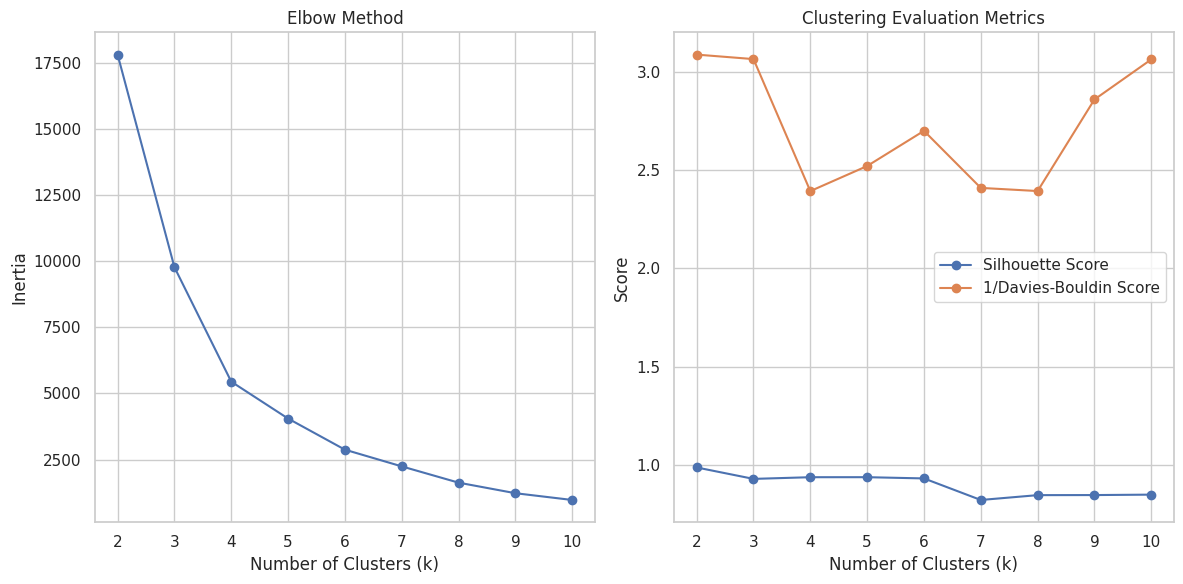

Optimal Number of Clusters: 4
Silhouette Score (as a measure of 'accuracy'): 0.9361
Davies-Bouldin Score: 0.4178


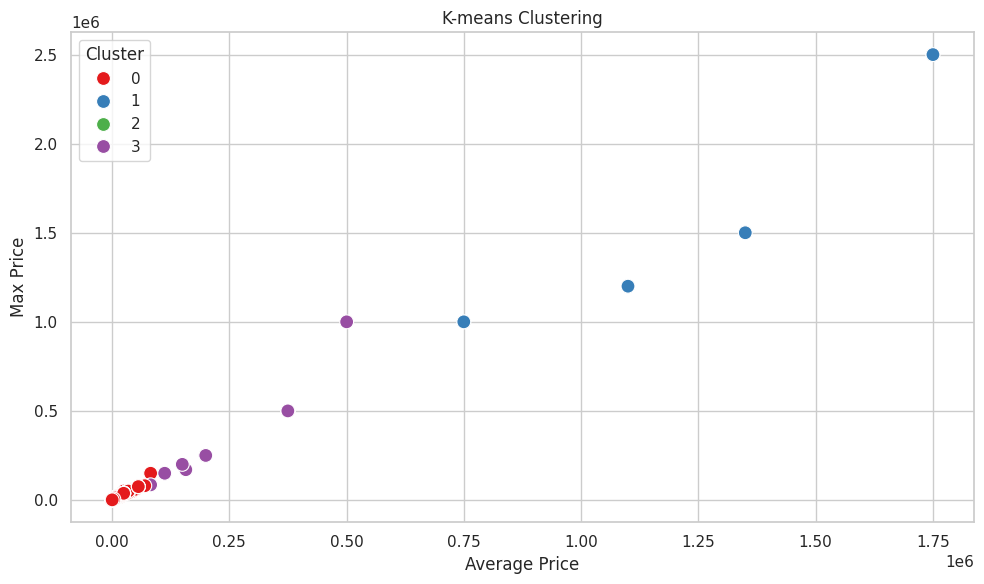

In [60]:
#k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset
data = pd.read_csv('C:/Users/parve/OneDrive/Desktop/desktop/ds project/freelancer.csv')  # Specify your dataset path

# Select features for K-means clustering
features = ['client_review_count', 'min_price', 'max_price', 'avg_price']  # Adjust as needed
X = data[features]

# Handle any missing values (if necessary)
X = X.fillna(X.mean())  # Replace NaN values with the mean of the column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 11)  # Testing from 2 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Plotting the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, [1/db for db in davies_bouldin_scores], marker='o', label='1/Davies-Bouldin Score')
plt.title('Clustering Evaluation Metrics')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters (based on elbow method or silhouette score)
optimal_k = 4  # Set this based on your analysis

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Calculate and print evaluation metrics
silhouette_avg = silhouette_score(X_scaled, data['cluster'])
davies_bouldin_avg = davies_bouldin_score(X_scaled, data['cluster'])

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Silhouette Score (as a measure of 'accuracy'): {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_price', y='max_price', hue='cluster', data=data, palette='Set1', s=100)
plt.title('K-means Clustering')
plt.xlabel('Average Price')
plt.ylabel('Max Price')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Columns in the dataset: ['projectId', 'job_title', 'job_description', 'tags', 'client_state', 'client_average_rating', 'client_review_count', 'min_price', 'max_price', 'avg_price', 'client_country_Afghanistan', 'client_country_Albania', 'client_country_Algeria', 'client_country_Andorra', 'client_country_Angola', 'client_country_Anilao', 'client_country_Argentina', 'client_country_Australia', 'client_country_Austria', 'client_country_Azerbaijan', 'client_country_BS', 'client_country_Bahamas', 'client_country_Bahrain', 'client_country_Bangladesh', 'client_country_Banten', 'client_country_Basudeb Berya', 'client_country_Belarus', 'client_country_Belgium', 'client_country_Belize', 'client_country_Bhutan', 'client_country_Block A', 'client_country_Bolivia', 'client_country_Bosnia and Herzegovina', 'client_country_Botswana', 'client_country_Brazil', 'client_country_Bulgaria', 'client_country_Burkina Faso', 'client_country_CA', 'client_country_CUAUHTEMOC', 'client_country_Cambodia', 'client_c

C:\Users\parve\AppData\Local\Temp\ipykernel_6612\1288057655.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Replace NaN values with the mean of the column


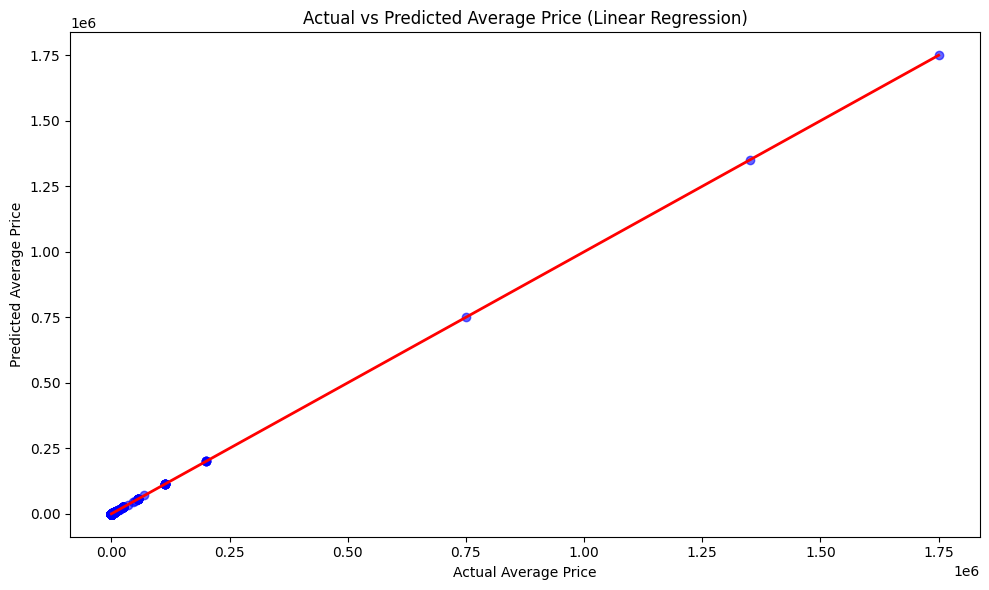

Model Coefficients:
                      Coefficient
client_review_count -1.156363e-14
min_price            5.000000e-01
max_price            5.000000e-01


In [29]:
#linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('C:/Users/parve/OneDrive/Desktop/desktop/ds project/freelancer.csv')

# Display the columns in the dataset
print("Columns in the dataset:", data.columns.tolist())

# Select features (independent variables) and target (dependent variable)
features = ['client_review_count', 'min_price', 'max_price']  # Adjust based on your dataset
target = 'avg_price'  # Ensure 'avg_price' exists in your dataset

# Prepare the feature and target DataFrames
X = data[features]
y = data[target]

# Handle any missing values (if necessary)
X.fillna(X.mean(), inplace=True)  # Replace NaN values with the mean of the column
y.fillna(y.mean(), inplace=True)  # Replace NaN values in the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Calculate accuracy as a percentage (R² Score)
accuracy = r2 * 100  # R² Score can be interpreted as a percentage
print(f"Model Accuracy: {accuracy:.2f}%")

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Line of equality
plt.title('Actual vs Predicted Average Price (Linear Regression)')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.tight_layout()
plt.show()

# Display coefficients
coefficients = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)


Columns in the dataset: ['projectId', 'job_title', 'job_description', 'tags', 'client_state', 'client_average_rating', 'client_review_count', 'min_price', 'max_price', 'avg_price', 'client_country_Afghanistan', 'client_country_Albania', 'client_country_Algeria', 'client_country_Andorra', 'client_country_Angola', 'client_country_Anilao', 'client_country_Argentina', 'client_country_Australia', 'client_country_Austria', 'client_country_Azerbaijan', 'client_country_BS', 'client_country_Bahamas', 'client_country_Bahrain', 'client_country_Bangladesh', 'client_country_Banten', 'client_country_Basudeb Berya', 'client_country_Belarus', 'client_country_Belgium', 'client_country_Belize', 'client_country_Bhutan', 'client_country_Block A', 'client_country_Bolivia', 'client_country_Bosnia and Herzegovina', 'client_country_Botswana', 'client_country_Brazil', 'client_country_Bulgaria', 'client_country_Burkina Faso', 'client_country_CA', 'client_country_CUAUHTEMOC', 'client_country_Cambodia', 'client_c

C:\Users\parve\AppData\Local\Temp\ipykernel_6612\2918104586.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Replace NaN values with the mean of the column


Mean Squared Error: 128432216.38
R² Score: 0.96
Model Accuracy: 95.96%
Cross-Validation Scores: [0.99738201 0.99015124 0.97863131 0.99968946 0.98367154]
Mean CV Score: 0.99


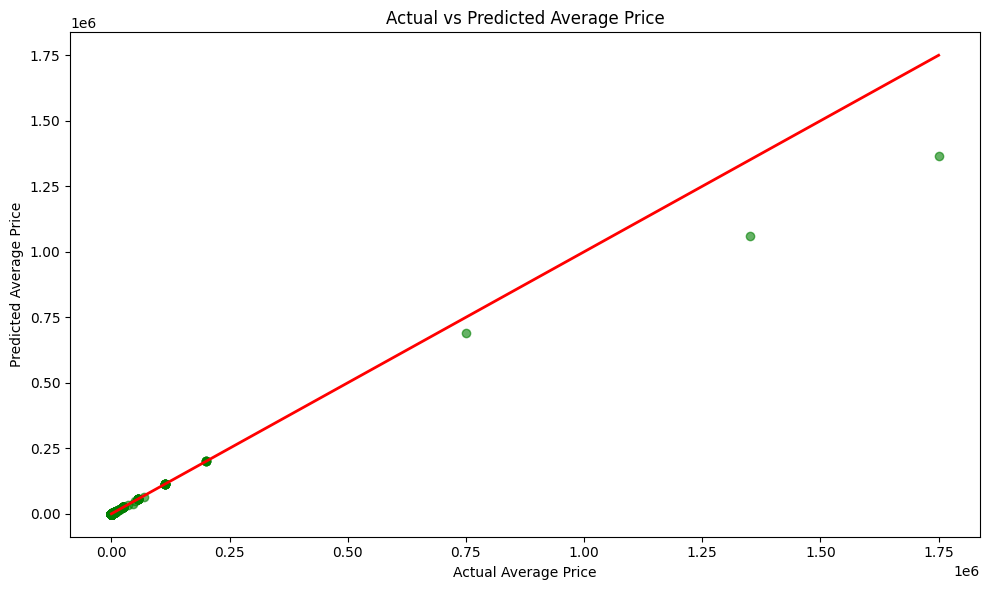

Feature Importances:
                     Importance
max_price              0.632522
min_price              0.357477
client_review_count    0.010001


In [23]:
#random forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('C:/Users/parve/OneDrive/Desktop/desktop/ds project/freelancer.csv')

# Display the columns in the dataset
print("Columns in the dataset:", data.columns.tolist())

# Select features (independent variables) and target (dependent variable)
# Adjust the features based on your dataset
features = ['client_review_count', 'min_price', 'max_price']  # Change this based on your dataset
target = 'avg_price'  # Make sure 'avg_price' exists in your dataset

# Prepare the feature and target DataFrames
X = data[features]
y = data[target]

# Handle any missing values (if necessary)
X.fillna(X.mean(), inplace=True)  # Replace NaN values with the mean of the column
y.fillna(y.mean(), inplace=True)  # Replace NaN values in the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Calculate accuracy as a percentage (1 - MSE)
accuracy = r2 * 100  # R² Score can be interpreted as a percentage
print(f"Model Accuracy: {accuracy:.2f}%")

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Line of equality
plt.title('Actual vs Predicted Average Price')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.tight_layout()
plt.show()

# Display feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)
